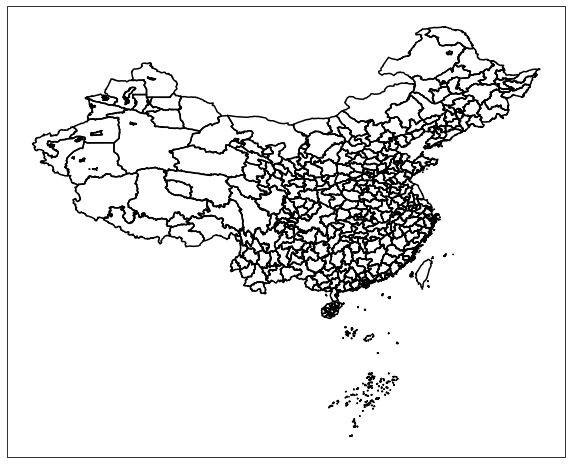

In [4]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from cnmaps import get_adm_maps, draw_maps

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

draw_maps(get_adm_maps(level='市')) 
plt.show()

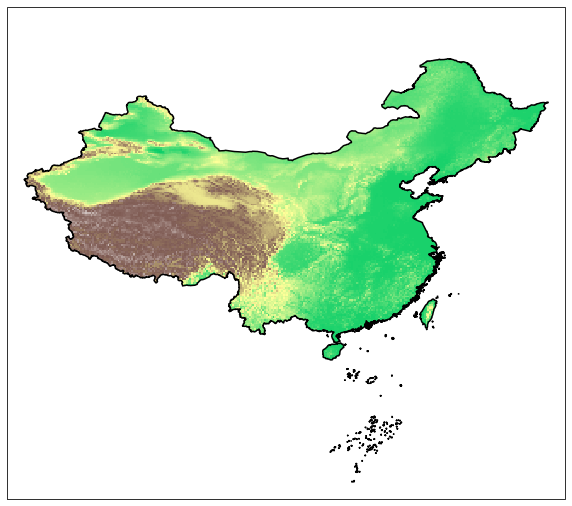

In [5]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from cnmaps import get_adm_maps, draw_map, clip_pcolormesh_by_map
from cnmaps.sample import load_dem

lons, lats, dem = load_dem()
fig = plt.figure(figsize=(10, 10))

map_polygon = get_adm_maps(country='中华人民共和国', record='first', only_polygon=True)

ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
mesh = ax.pcolormesh(lons, lats, dem, cmap=plt.cm.terrain, vmin=-2800, transform=ccrs.PlateCarree())
clip_pcolormesh_by_map(mesh, map_polygon)
draw_map(map_polygon, color='k')
ax.set_extent(map_polygon.get_extent())

plt.show()

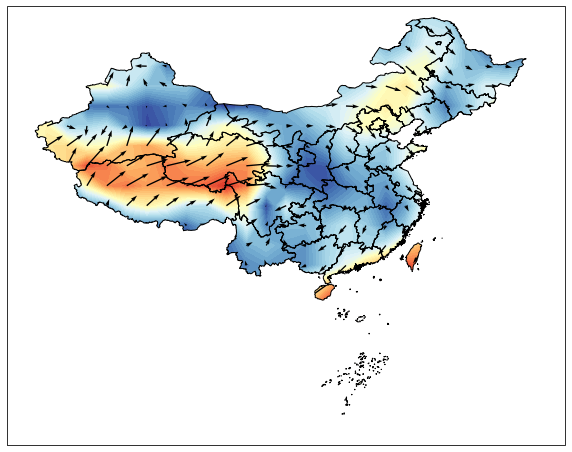

In [11]:
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from cnmaps import get_adm_maps, clip_quiver_by_map, clip_contours_by_map, draw_map
from cnmaps.sample import load_wind

lons, lats, u, v = load_wind()

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
map_polygon = get_adm_maps(country='中华人民共和国', record='first', only_polygon=True)

spd = (u ** 2 + v ** 2) ** 0.5

qv = ax.quiver(lons, lats, u, v,transform=ccrs.PlateCarree(), zorder=2)
cs = ax.contourf(lons, lats, spd, cmap=plt.cm.RdYlBu_r,
                levels=np.linspace(spd.min(), spd.max(), 50),
                transform=ccrs.PlateCarree(), zorder=1)

clip_contours_by_map(cs, map_polygon)
clip_quiver_by_map(qv, map_polygon)

draw_maps(get_adm_maps(level='省'), color='k', linewidth=1)

plt.show()